In [1]:
#custom files
import gridworld_converter
import robo_nav_algo
import free_space_finder
import utils
import obstacle_generator as obs

#standard files
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Preparation of the grid world

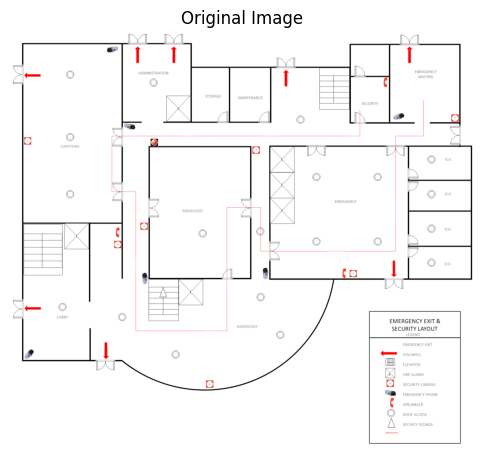

In [2]:
# Load the Image
image = cv2.imread('example6.png', cv2.IMREAD_COLOR)

utils.display_image('Original Image', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

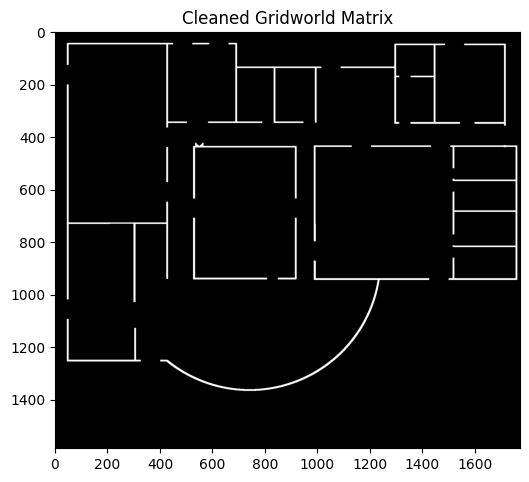

Number of rows: 1586
Number of columns: 1772


In [3]:
# 2d matrix representation of the above blueprint
gridworld = gridworld_converter.grid_convert('example6.png')
utils.display_image('Cleaned Gridworld Matrix', gridworld, cmap='gray', axis_switch = 'on')

print(f"Number of rows: {gridworld.shape[0]}\nNumber of columns: {gridworld.shape[1]}")

# Dynamic Obstacle Generator

In [19]:
# Define parameters
number_of_obstacles = 2
episode_length = 1000

# Initialize the pathfinding class
pathfinder = obs.Pathfinding(gridworld)

# Generate paths for obstacles
obstacle_paths = pathfinder.generate_paths(number_of_obstacles, episode_length)

#contains a dictionary of occupied coordinate as keys at different time step as value
'only one object can occupy a coordinate at a particular time stamp'
occupied_time_steps = pathfinder.occupied_time_steps

#contains a list of start or end coordinates of each dynamic obstacle
obstacle_occupied_points = pathfinder.obstacle_occupied_points
'''
Help:
You can see the obstacle path by obstacle_paths['1'] or obstacle_paths['2']
'''

"\nHelp:\nYou can see the obstacle path by obstacle_paths['1'] or obstacle_paths['2']\n"

In [20]:
last_key = list(occupied_time_steps.keys())[-1]

last_value = occupied_time_steps[last_key]


In [26]:
obstacle_occupied_points

[(1225, 713), (874, 1483), (1064, 1341), (445, 1632), (675, 766)]

In [22]:
occupied_time_steps[obstacle_occupied_points[3]]

999

In [23]:
obstacle_occupied_points

[(1225, 713), (874, 1483), (1064, 1341), (445, 1632), (675, 766)]


EXTRA CODE:
visualisation code for the above obstacles path


<IPython.core.display.Javascript object>


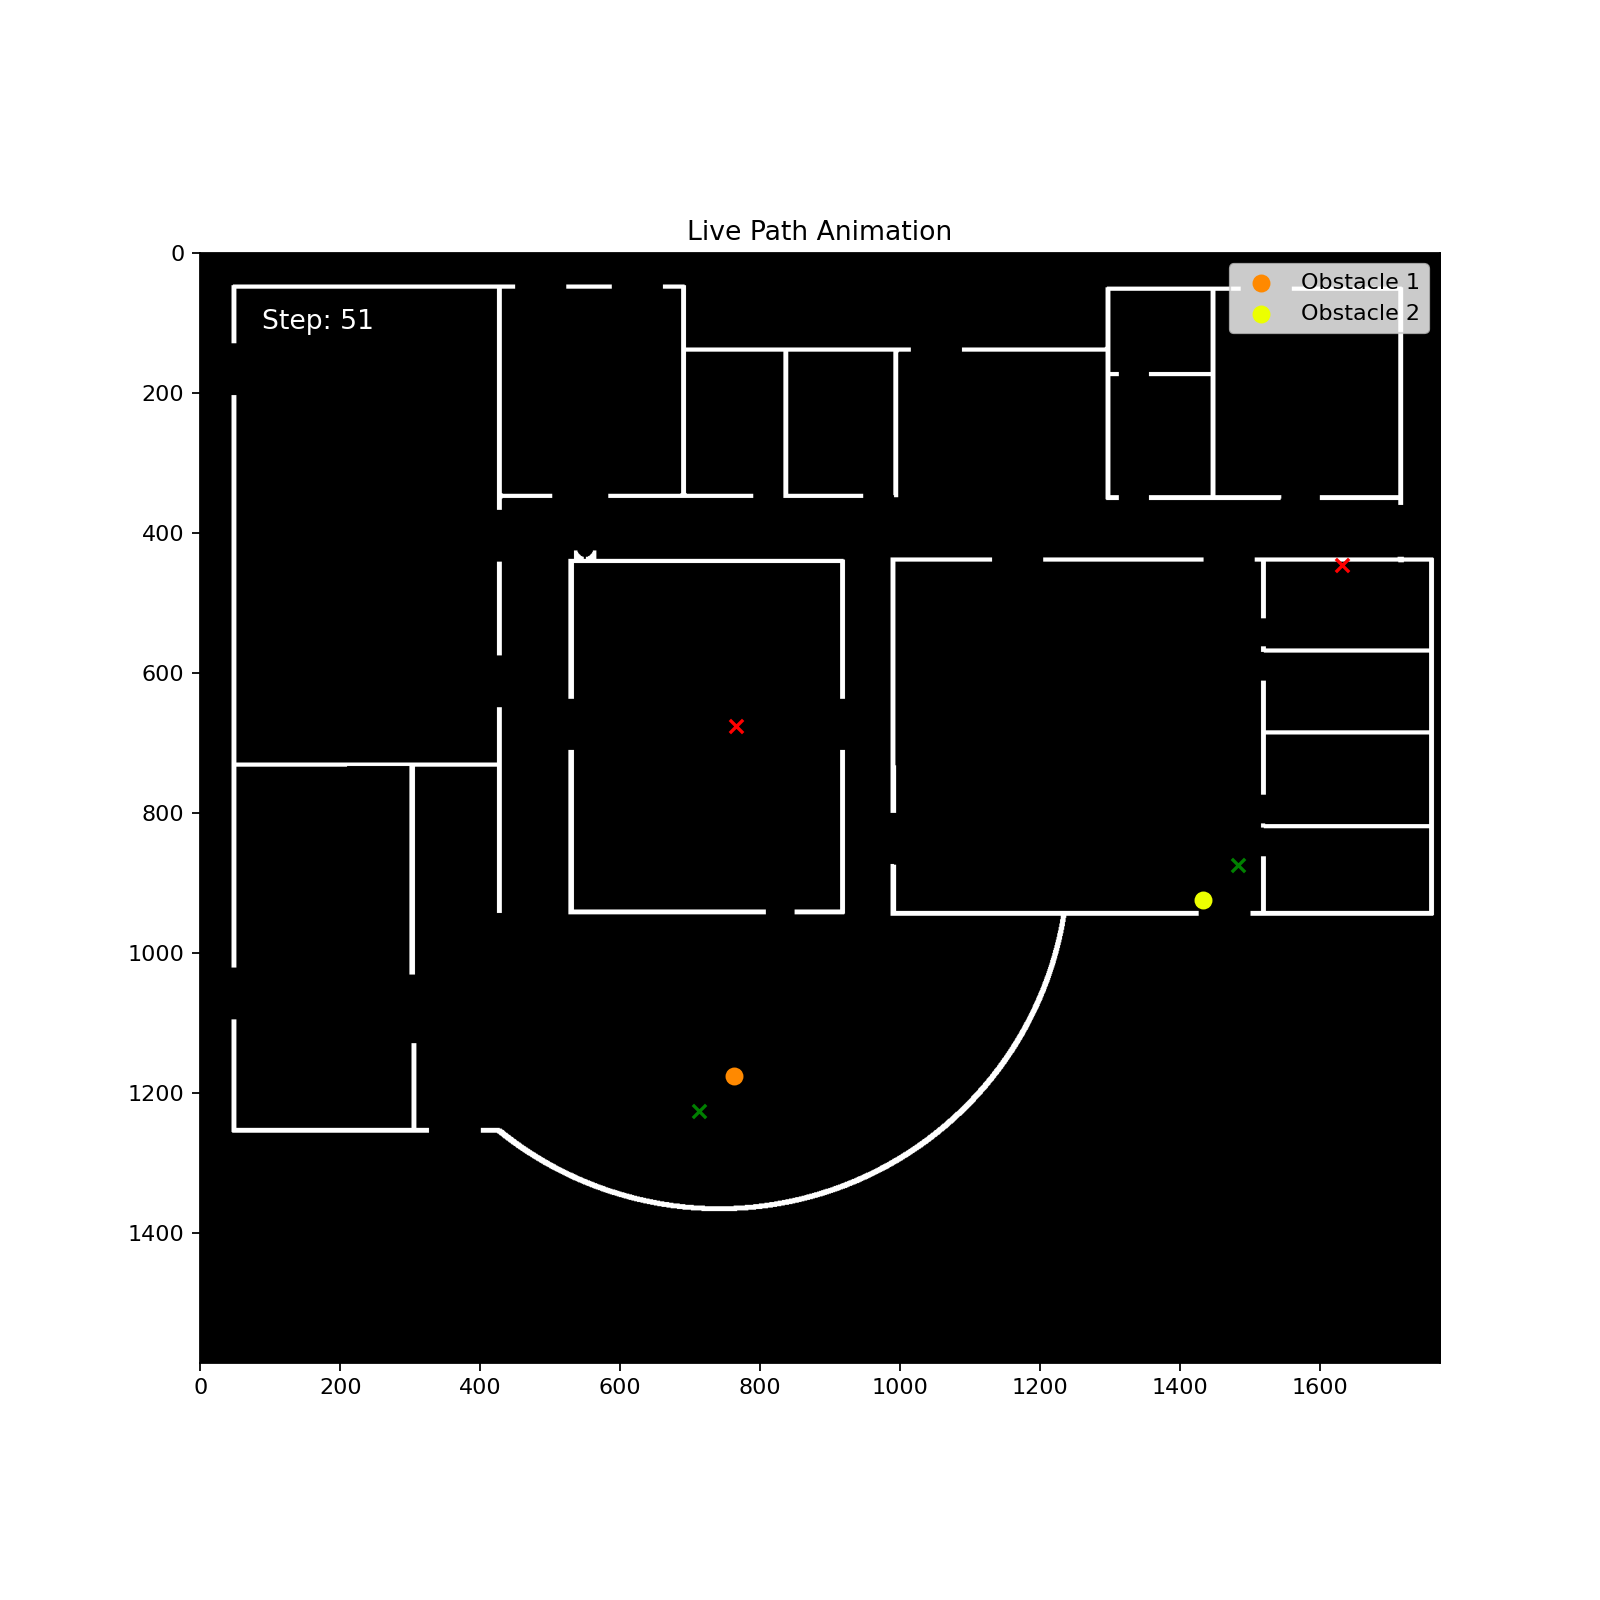

/var/folders/_w/vw1x_chj4193wcq3qzph9sl40000gn/T/ipykernel_9398/3169505345.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('hsv', num_colors + 10)


In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm

# Function to generate distinct colors for the obstacles
def generate_colors(num_colors):
    colormap = cm.get_cmap('hsv', num_colors + 10)
    return [colormap(i+1) for i in range(num_colors)]

# Create a figure for the live plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gridworld, cmap='gray')

# Initialize scatter plots for the objects' current positions
scatters = []
colors = generate_colors(number_of_obstacles)  # Different colors for different obstacles

for idx, key in enumerate(obstacle_paths.keys()):
    scatter = ax.scatter([], [], color=colors[idx % len(colors)], s=50, label=f'Obstacle {key}')
    scatters.append(scatter)

# Initialize the scatter points for start and end
for key, path in obstacle_paths.items():
    start_point = path[0]
    end_point = path[-1]
    ax.scatter([start_point[1]], [start_point[0]], c='green', marker='x')
    ax.scatter([end_point[1]], [end_point[0]], c='red', marker='x')

ax.legend()

# Initialize a text annotation for the step counter
step_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top',color='white')

# Function to update the scatter plots and step counter for each frame in the animation
def update_scatters(num, obstacle_paths, scatters):
    for idx, key in enumerate(obstacle_paths.keys()):
        path = obstacle_paths[key]
        if num < len(path):
            scatters[idx].set_offsets([path[num][1], path[num][0]])
    step_text.set_text(f'Step: {num + 1}')
    return scatters + [step_text]

# Calculate the maximum path length to set the number of frames in the animation
max_path_length = max(len(path) for path in obstacle_paths.values())

# Create the animation
ani = animation.FuncAnimation(fig, update_scatters, frames=episode_length, fargs=[obstacle_paths, scatters], interval=1, blit=True)

# Show the live plot
plt.title('Live Path Animation')
plt.show()


# Robot path finding

In [4]:
#find free space in the above gridworld matrix
'''
The start and end point can be hardcoded also. Below it is randomly assigned. 
'''

start_point = free_space_finder.find(gridworld) #return a tuple of coordinate (x,y) = (60, 92)
end_point = free_space_finder.find(gridworld)

#path generation of robot through algorithm
path = robo_nav_algo.planner(gridworld, start_point,end_point)

In [5]:
start_point


(60, 92)

# Code for live visualisation:


Prerequisite:

(1) Have a precalculated path through some algo

(2) Have a gridline ready



<IPython.core.display.Javascript object>


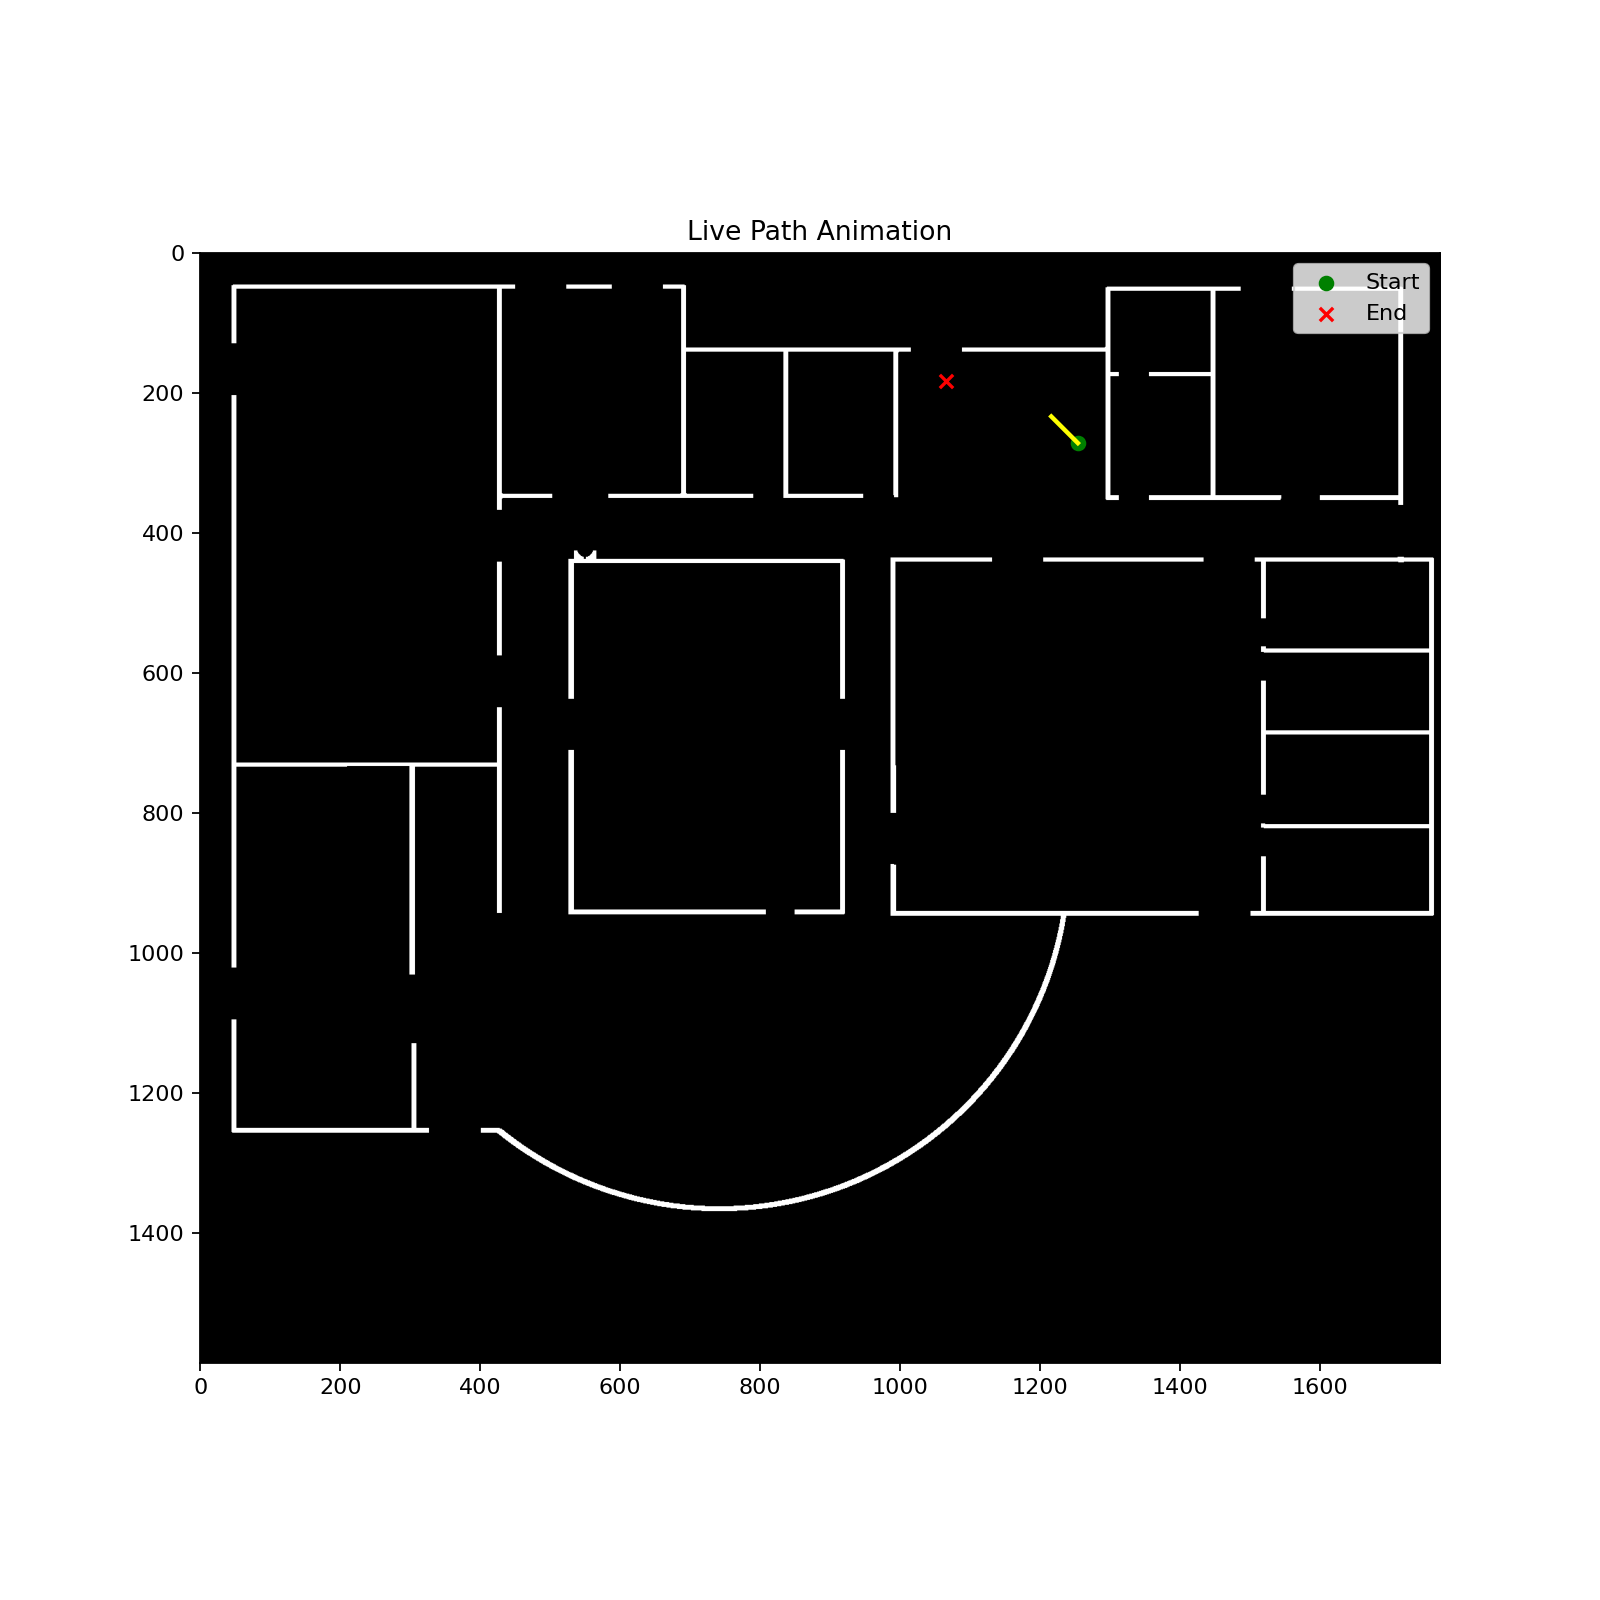

In [22]:


%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation



# Create a figure for the live plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gridworld, cmap='gray')

# Initialize the line for the path
line, = ax.plot([], [], color='yellow', linewidth=2)

# Initialize the scatter points for start and end
start_point = path[0]
end_point = path[-1]
ax.scatter([start_point[1]], [start_point[0]], c='green', marker='o', label='Start')
ax.scatter([end_point[1]], [end_point[0]], c='red', marker='x', label='End')
ax.legend()

# Function to update the line for each frame in the animation
def update_line(num, path, line):
    line.set_data([point[1] for point in path[:num]], [point[0] for point in path[:num]])
    return line,


# Create the animation
ani = animation.FuncAnimation(fig, update_line, frames=len(path), fargs=[path, line], interval=1, blit=True)

# Show the live plot
plt.title('Live Path Animation')

plt.show()

